In [1]:
import cv2 # For capturing Videos

import math # For helping with Image Sequencing

import matplotlib.pyplot as plt # I dont think I need this anymore
%matplotlib inline

import pandas as pd # For creating my training map
pd.set_option('display.max_columns', 30)

from keras.preprocessing import image # For preprocessing Images

import numpy as np # For converting my images into arrays to be fed into my model

from skimage.transform import resize # For resizing Images

from skimage.io import imread # To read the image

from skimage.io import imshow # to show the image

import os # To scroll through directory of classes

from keras.applications.vgg16 import preprocess_input # For preprocessing pixels for VGG16 to take in

from sklearn.model_selection import train_test_split # For doing some training on the model by splitting the data.

from keras.models import Sequential # The model which builds off of itself 

from keras.applications.vgg16 import VGG16 # The imagenet base model

from keras.layers import Dense, InputLayer, Dropout # Adding layers to the model

from sklearn.utils.class_weight import compute_class_weight, compute_sample_weight # helps with weights with little pictures

In [2]:
# Only use this when splicing a video file (Image Sequencing)
def image_sequencing(video_file, folder_location):
    """ 
    Function which splices the video file into images
    Inputs: video_file : location of video file
            folder_location: Where the images are placed
    Output: Spliced Images in folder location as directed
    """
    print('image sequencing...')
    count = 0
    cap = cv2.VideoCapture(video_file)
    frame_rate = cap.get(5)
    x = 1
    while(cap.isOpened()):
        frame_id = cap.get(1)
        ret, frame = cap.read()
        if(ret != True):
            break
        if(frame_id % math.floor(frame_rate) == 0):
            filename = f"{folder_location}/{folder_location.replace('/', '_')}_%d_frame.jpg" % count; count = count + 1
            cv2.imwrite(filename, frame)
    cap.release()
    print("Done")

In [3]:
# Run this only if you need to splice videos

#image_sequencing(video_file='batch_56/Training_Video_56.mp4',
#                 folder_location='batch_56')

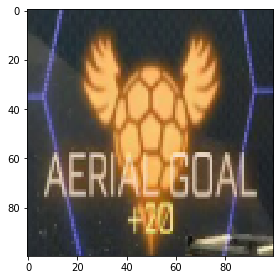

In [4]:
# To see an example:
img =imread('Train/Aerial Goals/batch_01_frame188.jpg')
# Resize and Crop the Image
test_1 = resize(img, output_shape=(700,700))
imshow(test_1[80:180, 300:400])

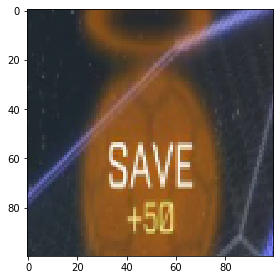

In [5]:
# Another Example
img2 =imread('Train/Saves/batch_01_frame103.jpg')
# Resize and Crop the Image
test_2 = resize(img2, output_shape=(700,700))[80:180, 300:400]
imshow(test_2)

In [6]:
# Creating Data Frame with the mapping of the features
labels = os.listdir('Train') 

image_id_column = []
for folder_name in labels:
    image_id_column = image_id_column + os.listdir(f'Train/{folder_name}')

class_column = []
for folder_name in labels:
    folder = os.listdir(f'Train/{folder_name}')
    print(folder_name)
    for image_id in folder:
        class_column.append(folder_name)
        
training_map = pd.DataFrame([image_id_column, class_column]).transpose()
training_map.columns = ['Image_ID', 'Classification']
training_map

AA Background
Aerial Goals
Assists
Backwards Goals
Bicycle Goals
Center Balls
Clear Balls
Demolitions
Epic Saves
Exterminations
First Touches
Goals
Hat Tricks
Long Goals
Low Fives
MVPs
Overtime Goals
Playmaker
Pool Shots
Saves
Saviors
Shots on Goal
Turtle Goals
Wins


,Image_ID,Classification
0,0 frame.jpg,AA Background
1,1 frame.jpg,AA Background
2,10 frame.jpg,AA Background
3,11 frame.jpg,AA Background
4,117 frame.jpg,AA Background
...,...,...
1252,batch_52_249_frame.jpg,Wins
1253,batch_53_302_frame.jpg,Wins
1254,batch_53_303_frame.jpg,Wins
1255,batch_56_10_frame.jpg,Wins


In [7]:
# Converting images into pixels
X = [] 

for folder in labels:
    images_by_folder = os.listdir(f'Train/{folder}')
    for image_id in images_by_folder:
        img = plt.imread(f'Train/{folder}/' + image_id)
        X.append(img)

X = np.array(X)  # Entire array of images for training/validation.

In [8]:
X.shape

(1257, 720, 1280, 3)

In [9]:
# Converting classes to a dummified version
Y = training_map['Classification']
Y = pd.get_dummies(Y)
Y.head()

,AA Background,Aerial Goals,Assists,Backwards Goals,Bicycle Goals,Center Balls,Clear Balls,Demolitions,Epic Saves,Exterminations,First Touches,Goals,Hat Tricks,Long Goals,Low Fives,MVPs,Overtime Goals,Playmaker,Pool Shots,Saves,Saviors,Shots on Goal,Turtle Goals,Wins
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
# Resizes images and crops them for Keras Model
image = []
for i in range(0, X.shape[0]):
    a = resize(X[i], preserve_range=True, output_shape=(700,700))[80:180, 300:400].astype(int) # Crop shape: 100 by 100
    image.append(a)

X = np.array(image)


In [11]:
print(X)
print(X.shape)

[[[[ 82  82  74]
   [ 84  84  76]
   [ 86  86  78]
   ...
   [131 122  95]
   [115 103  79]
   [114 102  82]]

  [[ 83  83  75]
   [ 84  84  76]
   [ 86  86  78]
   ...
   [127 116  91]
   [115 103  79]
   [113 100  80]]

  [[ 83  83  75]
   [ 85  85  77]
   [ 86  86  78]
   ...
   [122 111  90]
   [119 106  86]
   [116 102  86]]

  ...

  [[ 84  83  79]
   [ 82  86  85]
   [ 81  87  87]
   ...
   [ 71  73  72]
   [ 71  73  72]
   [ 72  74  73]]

  [[ 78  77  74]
   [ 79  83  83]
   [ 81  87  87]
   ...
   [ 74  76  75]
   [ 74  76  75]
   [ 73  75  74]]

  [[ 89  90  85]
   [ 71  75  75]
   [ 76  81  83]
   ...
   [ 69  71  70]
   [ 74  76  75]
   [ 69  71  70]]]


 [[[ 82  82  74]
   [ 84  84  76]
   [ 86  86  78]
   ...
   [134 121 104]
   [115 101  87]
   [113 101  83]]

  [[ 83  83  75]
   [ 84  84  76]
   [ 86  86  78]
   ...
   [128 115  95]
   [115 102  86]
   [112 100  84]]

  [[ 83  83  75]
   [ 85  85  77]
   [ 86  86  78]
   ...
   [123 110  88]
   [119 105  88]
   [115 102

In [12]:
# Prepares to push into base model
X = preprocess_input(X)

In [13]:
print(X.shape)
print(X)

(1257, 100, 100, 3)
[[[[-2.9939003e+01 -3.4778999e+01 -4.1680000e+01]
   [-2.7939003e+01 -3.2778999e+01 -3.9680000e+01]
   [-2.5939003e+01 -3.0778999e+01 -3.7680000e+01]
   ...
   [-8.9390030e+00  5.2210007e+00  7.3199997e+00]
   [-2.4939003e+01 -1.3778999e+01 -8.6800003e+00]
   [-2.1939003e+01 -1.4778999e+01 -9.6800003e+00]]

  [[-2.8939003e+01 -3.3778999e+01 -4.0680000e+01]
   [-2.7939003e+01 -3.2778999e+01 -3.9680000e+01]
   [-2.5939003e+01 -3.0778999e+01 -3.7680000e+01]
   ...
   [-1.2939003e+01 -7.7899933e-01  3.3199997e+00]
   [-2.4939003e+01 -1.3778999e+01 -8.6800003e+00]
   [-2.3939003e+01 -1.6778999e+01 -1.0680000e+01]]

  [[-2.8939003e+01 -3.3778999e+01 -4.0680000e+01]
   [-2.6939003e+01 -3.1778999e+01 -3.8680000e+01]
   [-2.5939003e+01 -3.0778999e+01 -3.7680000e+01]
   ...
   [-1.3939003e+01 -5.7789993e+00 -1.6800003e+00]
   [-1.7939003e+01 -1.0778999e+01 -4.6800003e+00]
   [-1.7939003e+01 -1.4778999e+01 -7.6800003e+00]]

  ...

  [[-2.4939003e+01 -3.3778999e+01 -3.9680000e+

In [14]:
# Splitting data into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [15]:
# Initializes Base model with Imagenet, does not include the top layer of imagenet (parameters)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(100, 100, 3))

In [16]:
X_train = base_model.predict(X_train)

In [17]:
X_test = base_model.predict(X_test)

In [18]:
print(X_train.shape)
print(X_test.shape)

(1005, 3, 3, 512)
(252, 3, 3, 512)


In [19]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]*512)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]*512)

In [20]:
print(X_train.shape)
print(X_test.shape)

(1005, 4608)
(252, 4608)


In [21]:
train = X_train/X_train.max()
X_test = X_test/X_train.max()

In [22]:
model = Sequential()
model.add(InputLayer((3*3*512)))
model.add(Dense(units = 512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(24, activation='softmax'))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               2359808   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 24)                3

In [24]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
# computing weights of different classes (Never Used, Saved for future use.)
#class_weights = compute_class_weight(class_weight='balanced', 
#                     classes=np.unique(training_map['Classification']), 
#                     y=training_map['Classification'])
#print(class_weights)
#print(training_map['Classification'].unique())


#class_weights_dict = {} # Turn into dictionary to feed into class weights parameter
#for class_weight_name, class_weight  in zip(training_map['Classification'].unique(), class_weights):
#    class_weights_dict[class_weight_name] = class_weight

#print(class_weights_dict)

In [26]:
from keras.callbacks import ModelCheckpoint
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]      # model check pointing based on validation loss

In [27]:
model.fit(train, Y_train, epochs=25, validation_data=(X_test, Y_test), callbacks=callbacks_list)

Epoch 1/25
31/32 [============================>.] - ETA: 0s - loss: 2.9288 - accuracy: 0.1159
Epoch 00001: val_loss improved from inf to 2.50014, saving model to weights.best.hdf5
32/32 [==============================] - 1s 20ms/step - loss: 2.9223 - accuracy: 0.1154 - val_loss: 2.5001 - val_accuracy: 0.2937
Epoch 2/25
31/32 [============================>.] - ETA: 0s - loss: 2.4425 - accuracy: 0.2762
Epoch 00002: val_loss improved from 2.50014 to 1.92723, saving model to weights.best.hdf5
32/32 [==============================] - 0s 13ms/step - loss: 2.4346 - accuracy: 0.2786 - val_loss: 1.9272 - val_accuracy: 0.5516
Epoch 3/25
31/32 [============================>.] - ETA: 0s - loss: 1.8143 - accuracy: 0.4869
Epoch 00003: val_loss improved from 1.92723 to 1.32202, saving model to weights.best.hdf5
32/32 [==============================] - 0s 13ms/step - loss: 1.8107 - accuracy: 0.4876 - val_loss: 1.3220 - val_accuracy: 0.7024
Epoch 4/25
27/32 [========================>.....] - ETA: 0s - 

In [28]:
# Test Map Function
def image_processing(video_file, folder_location):
    '''
    Function which processes the images using the image sequencing function
    and storing it into variable which is prepared to be processed by the Keras
    prediction_classes function
    Inputs: video_file, folder_location
    Output: test_image - prepped to be taken into prediction_classes function
    '''
    
    test_image = []
    
    image_sequencing(video_file, folder_location)
    
    print('filtering images...')
    
    image_names = list(filter(lambda image: image.endswith('.jpg'), 
                              os.listdir(folder_location))) # List of images ending with .jpg
    
    print('Done')
    
    print('grabbing images...')
    
    for img_name in image_names:
        image = plt.imread(f'{folder_location}/{img_name}')
        test_image.append(image)

    test_images = np.array(test_image)
    
    print('Done')
    
    test_image = []
    
    print('resizing images...')
    
    for i in range(0, test_images.shape[0]):
        a = resize(test_images[i], 
                   preserve_range=True, 
                   output_shape=(700,700))[80:180, 300:400].astype(int)
        test_image.append(a)
    
    print('Done')
    
    test_image = np.array(test_image)

    test_image = preprocess_input(test_image)
    
    print('Predicting Images...')

    # extracting features from the images using pretrained model
    test_image = base_model.predict(test_image)

    # converting the images to 1-D form
    test_image = test_image.reshape(test_image.shape[0],
                                              test_image.shape[1]*test_image.shape[2]*512)
    
    print('Done')
    
    print('Centering Images...')

    # zero centered images
    test_image = test_image/test_image.max()
    
    print('All Done')
    
    return(test_image)
    
    

In [43]:
# Processes the images to be fed into prediction function which determines what each label is. 
#test_1 = image_processing('Test_1/Test_Video_1.mp4', 'Test_1')
#test_2 = image_processing('Test_2/Test_Video_2.mp4', 'Test_2')
#test_3 = image_processing('Test_3/Test_Video_3.mp4', 'Test_3')
#test_4 = image_processing('Test_4/Test_Video_4.mp4', 'Test_4')
#determinant_1 = image_processing('Determinant_1/Determinant_Video.mp4', 'Determinant_1')


# Processing videos to be rendered for Chase Profile:
chase_images = []
for index in range(1,31):
    images = image_processing(f'Chase_Profile/Chase_Profile_Video_{index}.mp4', f'Chase_Profile/Images_{index}')
    chase_images.append(images)

determinant_chase_images = image_processing('Chase_Profile/Determinant_Chase_Video.mp4', 'Chase_Profile/Determinant_Images')

image sequencing...
Done
filtering images...
Done
grabbing images...
Done
resizing images...
Done
Predicting Images...
Done
Centering Images...
All Done
image sequencing...
Done
filtering images...
Done
grabbing images...
Done
resizing images...
Done
Predicting Images...
Done
Centering Images...
All Done
image sequencing...
Done
filtering images...
Done
grabbing images...
Done
resizing images...
Done
Predicting Images...
Done
Centering Images...
All Done
image sequencing...
Done
filtering images...
Done
grabbing images...
Done
resizing images...
Done
Predicting Images...
Done
Centering Images...
All Done
image sequencing...
Done
filtering images...
Done
grabbing images...
Done
resizing images...
Done
Predicting Images...
Done
Centering Images...
All Done
image sequencing...
Done
filtering images...
Done
grabbing images...
Done
resizing images...
Done
Predicting Images...
Done
Centering Images...
All Done
image sequencing...
Done
filtering images...
Done
grabbing images...
Done
resizing

In [30]:
# Test map preparation: Used to check true accuracy for just testing purposes. In future, this becomes invalid.
determinant = pd.read_csv('Determinant_1/Determinant_1_Map.csv')

In [31]:
# Feed into prediction:
determinant_outcome = determinant.drop(columns='Image_ID')
determinant_outcome.columns

Index(['AA Background', 'Aerial Goals', 'Assists', 'Backwards Goals',
       'Bicycle Goals', 'Center Balls', 'Clear Balls', 'Demolitions',
       'Epic Saves', 'Exterminations', 'First Touches', 'Goals', 'Hat Tricks',
       'Long Goals', 'Low Fives', 'MVPs', 'Overtime Goals', 'Playmaker',
       'Pool Shots', 'Saves', 'Saviors', 'Shots on Goal', 'Turtle Goals',
       'Wins'],
      dtype='object')

In [32]:
model.load_weights("weights.best.hdf5")

In [33]:
# Calculates the accuracy of the video given the test video (with unlabeled frames)
scores= model.evaluate(determinant_1, determinant_outcome)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

19/19 [==============================] - 0s 3ms/step - loss: 2.1545 - accuracy: 0.6718
accuracy: 67.18%


In [34]:
def prediction_dictionary_maker(labels, processed_images):
    """
    Takes labels and processed images that the model predicts on and feeds into
    dictionary in counted form to be fed into DataFrame.
    
    Inputs: labels - Folders that the images are coming from or list of labels to be used.
            processed_images - Images that were processed by image_processing
    
    Outputs: prediction_dict - counted dictionary
    """
    prediction_dict = {}
    prediction_test = np.argmax(model.predict(processed_images), axis=-1)
    labels_test = [labels[_class] for _class in prediction_test]

    for name in labels:
        prediction_dict[name] = labels_test.count(name)

    return(prediction_dict)

In [37]:
# Predicted outcomes of the model.

labels = os.listdir('Train')

#test_1_predictions = prediction_dictionary_maker(labels=labels, processed_images=test_1)
#test_2_predictions = prediction_dictionary_maker(labels=labels, processed_images=test_2)
#test_3_predictions = prediction_dictionary_maker(labels=labels, processed_images=test_3)
#test_4_predictions = prediction_dictionary_maker(labels=labels, processed_images=test_4)
determinant_predictions = prediction_dictionary_maker(labels=labels, processed_images=determinant_1)
#prediction_dicts = [test_1_predictions, test_2_predictions, test_3_predictions, 
#                    test_4_predictions]

determinant_dicts = [determinant_predictions]

#predictions_df = pd.concat([pd.Series(d) for d in prediction_dicts], axis=1).transpose()
determinant_df = pd.concat([pd.Series(d) for d in determinant_dicts], axis=1).transpose()

In [44]:
# Predictions on all processed images of the model.

chase_processed_images_dict = []
for images_processed in chase_images:
    chase_predictions = prediction_dictionary_maker(labels, processed_images=images_processed)
    chase_processed_images_dict.append(chase_predictions)
    
chase_profile_df = pd.concat([pd.Series(d) for d in chase_processed_images_dict], axis=1).transpose() 

determinant_chase_predictions = prediction_dictionary_maker(labels=labels, 
                                                            processed_images=determinant_chase_images)
determinant_chase_dicts = [determinant_chase_predictions]
determinant_chase_df = pd.concat([pd.Series(d) for d in determinant_chase_dicts], axis=1).transpose()

chase_profile_df

,AA Background,Aerial Goals,Assists,Backwards Goals,Bicycle Goals,Center Balls,Clear Balls,Demolitions,Epic Saves,Exterminations,First Touches,Goals,Hat Tricks,Long Goals,Low Fives,MVPs,Overtime Goals,Playmaker,Pool Shots,Saves,Saviors,Shots on Goal,Turtle Goals,Wins
0,262,0,0,0,0,12,17,8,4,0,3,3,0,0,0,5,0,0,0,11,2,4,0,4
1,424,4,3,0,0,20,12,1,0,0,15,7,0,1,0,11,0,0,0,10,0,11,0,11
2,291,1,9,0,0,8,14,9,0,0,17,10,0,1,0,2,0,0,0,6,0,4,0,22
3,287,1,3,0,0,15,9,10,1,0,5,2,0,0,0,2,0,0,0,13,0,4,0,13
4,355,2,4,0,0,17,14,12,2,0,31,6,0,1,0,0,0,0,0,9,1,9,0,9
5,313,0,0,0,0,13,21,5,0,0,4,6,0,1,0,2,0,0,0,4,0,10,0,7
6,334,0,2,0,0,21,10,1,0,0,14,9,2,0,0,5,0,0,0,6,1,11,0,6
7,324,3,10,0,0,15,22,8,2,0,3,8,0,1,0,2,0,0,0,3,0,3,0,23
8,228,0,3,0,0,13,22,10,0,0,52,7,0,0,0,3,0,0,0,4,0,0,0,18
9,281,3,3,0,0,21,7,11,0,0,9,1,0,0,0,1,0,0,0,21,0,1,0,14


In [53]:
def modified_accuracy(predictions_test_df):
    """
    Takes in a Dataframe and outputs the computer's results for the predictions after
    modification.
    
    Input: predictions_test_df - takes in DataFrame
    Output: predictions_test_df - outputs Dataframe modified 
    """
    predictions_test_df = (predictions_test_df.drop(columns=['AA Background'])/3).apply(np.ceil)
    row = 0
    for wins, mvp in zip(predictions_test_df['Wins'], predictions_test_df['MVPs']):
        if wins > 0:
            predictions_test_df['Wins'][row] = 1
        if mvp > 0:
            predictions_test_df['MVPs'][row] = 1
        row = row + 1
    
    return(predictions_test_df)

In [54]:
#computer_results_df = modified_accuracy(predictions_df)
computer_determinant_results = modified_accuracy(determinant_df)
computer_determinant_results

,Aerial Goals,Assists,Backwards Goals,Bicycle Goals,Center Balls,Clear Balls,Demolitions,Epic Saves,Exterminations,First Touches,Goals,Hat Tricks,Long Goals,Low Fives,MVPs,Overtime Goals,Playmaker,Pool Shots,Saves,Saviors,Shots on Goal,Turtle Goals,Wins
0,0.0,1.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0,35.0,7.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0


In [61]:
# Given DataFrame, Modify the accuracy of the dataframe to actual statistics
computer_chase_profile_results = modified_accuracy(chase_profile_df)
#computer_chase_profile_results.drop(columns=['Aerial Goals', 'Backwards Goals', 'Bicycle Goals',
#                              'Hat Tricks', 'Long Goals', 'Low Fives', 'Overtime Goals',
#                              'Playmaker', 'Pool Shots', 'Saviors', 'Turtle Goals', 'Wins'])

#computer_determinant_chase_results = modified_accuracy(determinant_chase_df)
computer_determinant_chase_results.drop(columns=['Aerial Goals', 'Backwards Goals', 'Bicycle Goals',
                              'Hat Tricks', 'Long Goals', 'Low Fives', 'Overtime Goals',
                              'Playmaker', 'Pool Shots', 'Saviors', 'Turtle Goals', 'Wins'])


,Assists,Center Balls,Clear Balls,Demolitions,Epic Saves,Exterminations,First Touches,Goals,MVPs,Saves,Shots on Goal
0,0.0,4.0,3.0,3.0,0.0,0.0,2.0,2.0,2.0,1.0,3.0


In [41]:
# Compares accuracy of model

true_dict = {'Aerial Goals': [0],
                'Assists': [0],
                'Backwards Goals': [0],
                'Bicycle Goals': [0],
                'Center Balls': [2],
                'Clear Balls': [2],
                'Demolitions': [0],
                'Epic Saves': [0],
                'Exterminantions': [0],
                'First Touches': [1],
                'Goals': [2],
                'Hat Tricks': [0],
                'Long Goals': [0],
                'Low Fives': [0],
                'MVPs': [0],
                'Overtime Goals': [0],
                'Playmaker': [0],
                'Pool Shots': [0],
                'Saves': [0],
                'Saviors': [0],
                'Shots on Goal': [3],
                'Turtle Goals': [0],
                'Wins': [1]
               }
true_results = pd.DataFrame.from_dict(true_dict)

true_results

,Aerial Goals,Assists,Backwards Goals,Bicycle Goals,Center Balls,Clear Balls,Demolitions,Epic Saves,Exterminantions,First Touches,Goals,Hat Tricks,Long Goals,Low Fives,MVPs,Overtime Goals,Playmaker,Pool Shots,Saves,Saviors,Shots on Goal,Turtle Goals,Wins
0,0,0,0,0,2,2,0,0,0,1,2,0,0,0,0,0,0,0,0,0,3,0,1


In [56]:
a = computer_determinant_results.values
b = true_results.values
print('Modified Accuracy Rate:', f'{round(sum(a[0]==b[0])/len(a[0]), 2) * 100}%')

Modified Accuracy Rate: 65.0%


In [57]:
# Last Objective:
# Compare average Player's average game results to their current game.
# Center and Scale
# Take Average of each score and standard devation and compare z-scores. Z = X-mu/sd 
#if Z > 2, doing better than normal, -2<Z<2 average, Z<-2 below average.  

def calculate_results(avg_results, new_results):
    '''
    Calculates the results between your average gameplay in Rocket League and your Results in your Last Game.
    
    Inputs: avg_results - DataFrame with all your statistics.
            new_results - DataFrame with new statistics
    Output: Prints out how player did.
    '''
    zscores = []
    
    avg_results = avg_results.drop(columns=['Aerial Goals', 'Backwards Goals', 'Bicycle Goals',
                              'Hat Tricks', 'Long Goals', 'Low Fives', 'Overtime Goals',
                              'Playmaker', 'Pool Shots', 'Saviors', 'Turtle Goals', 'Wins'])
    
    new_results = new_results.drop(columns=['Aerial Goals', 'Backwards Goals', 'Bicycle Goals',
                              'Hat Tricks', 'Long Goals', 'Low Fives', 'Overtime Goals',
                              'Playmaker', 'Pool Shots', 'Saviors', 'Turtle Goals', 'Wins'])
    
    means = avg_results.agg(['mean']).loc['mean', :]
    stds = avg_results.agg(['std']).loc['std', :]
    
    for col_name in new_results.columns:
        if stds[col_name] == 0:
            zscores.append(0)
        
        else:
            zscore = (new_results[col_name] - means[col_name])/stds[col_name]
            zscores.append(zscore)

    results = np.mean(zscores)
    print('Average Z-score:', results)
    
    if results > 2:
        print('Player is playing above their average level.\n', 
              'We adivse you to keep the player in.')
    
    elif results <= 2 or results <-2:
        print('Player is playing their average level.')
    
    else:
        print('Player is playing below their average level.\n',
              'We advise to switch the player out.')
    
        

In [60]:
#calculate_results(avg_results=computer_results_df, new_results=computer_determinant_results)

In [62]:
# Given Player Profile, calculate how they did in their game:
calculate_results(avg_results=computer_chase_profile_results, new_results=computer_determinant_chase_results)

Average Z-score: -0.059874305081762766
Player is playing their average level.
